In [1]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as kernels
import forAustin as fa

In [2]:
fits = pf.open('/media/data/austinfortino/austinFull.fits')
fits.info()
nExposure = 432
exposure = fa.getExposure(fits, nExposure, polyOrder=3)

Filename: /media/data/austinfortino/austinFull.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  Exposures     1 BinTableHDU     47   2820R x 19C   [1D, 1D, 4A, 1D, 8A, 1D, 1J, 1J, 1D, 1D, 8A, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  2  RESIDUALS     1 BinTableHDU     25   73818788R x 8C   [I, J, D, D, D, D, D, L]   


In [3]:
ind = np.where(exposure['hasGaia'])[0]
u = np.take(exposure['u'], ind)
v = np.take(exposure['v'], ind)
dx = np.take(exposure['dx'], ind)
dy = np.take(exposure['dy'], ind)
err = np.take(exposure['measErr'], ind)

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(u, dx, test_size=0.20, random_state=1)
kernel = kernels.RBF(1) + kernels.WhiteKernel(1)
ugp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)
ugp.fit(Xtrain.reshape(-1, 1), Ytrain)

u_Ypred, cov = ugp.predict(Xtest.reshape(-1, 1), return_cov=True)
variance = np.diag(cov)
u_sigma = np.sqrt(variance)

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(v, dy, test_size=0.20, random_state=1)
kernel = kernels.RBF(1) + kernels.WhiteKernel(1)
vgp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)
vgp.fit(Xtrain.reshape(-1, 1), Ytrain)

v_Ypred, cov = vgp.predict(Xtest.reshape(-1, 1), return_cov=True)
variance = np.diag(cov)
v_sigma = np.sqrt(variance)

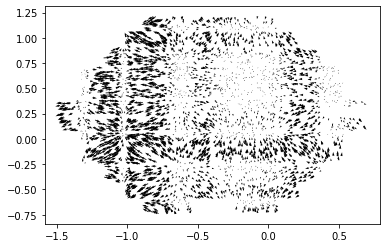

In [8]:
us = train_test_split(u, dx, test_size=0.20, random_state=1)
vs = train_test_split(v, dy, test_size=0.20, random_state=1)
plt.quiver(us[1], vs[1], u_Ypred, v_Ypred, )

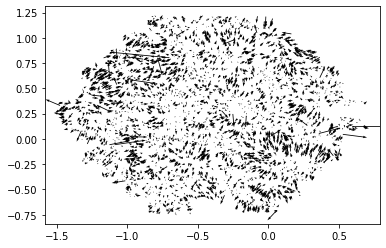

In [9]:
plt.quiver(us[1], vs[1], us[3], vs[3])